In [155]:
import kaggle
import os
import zipfile
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import sklearn
import numpy as np
import lightgbm as lgb
from xgboost import XGBRegressor

In [2]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0




  0%|          | 0.00/16.0k [00:00<?, ?B/s]
100%|██████████| 16.0k/16.0k [00:00<00:00, 42.4kB/s]
100%|██████████| 16.0k/16.0k [00:01<00:00, 12.0kB/s]


In [3]:
zip_file = 'insurance.zip'
destination_folder = 'unzipped_data' 

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print('Dataset unzipped successfully!')

Dataset unzipped successfully!


In [10]:
df = pd.read_csv('unzipped_data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
features_scatter = ['age','bmi']
features = ['sex','children','smoker','region']

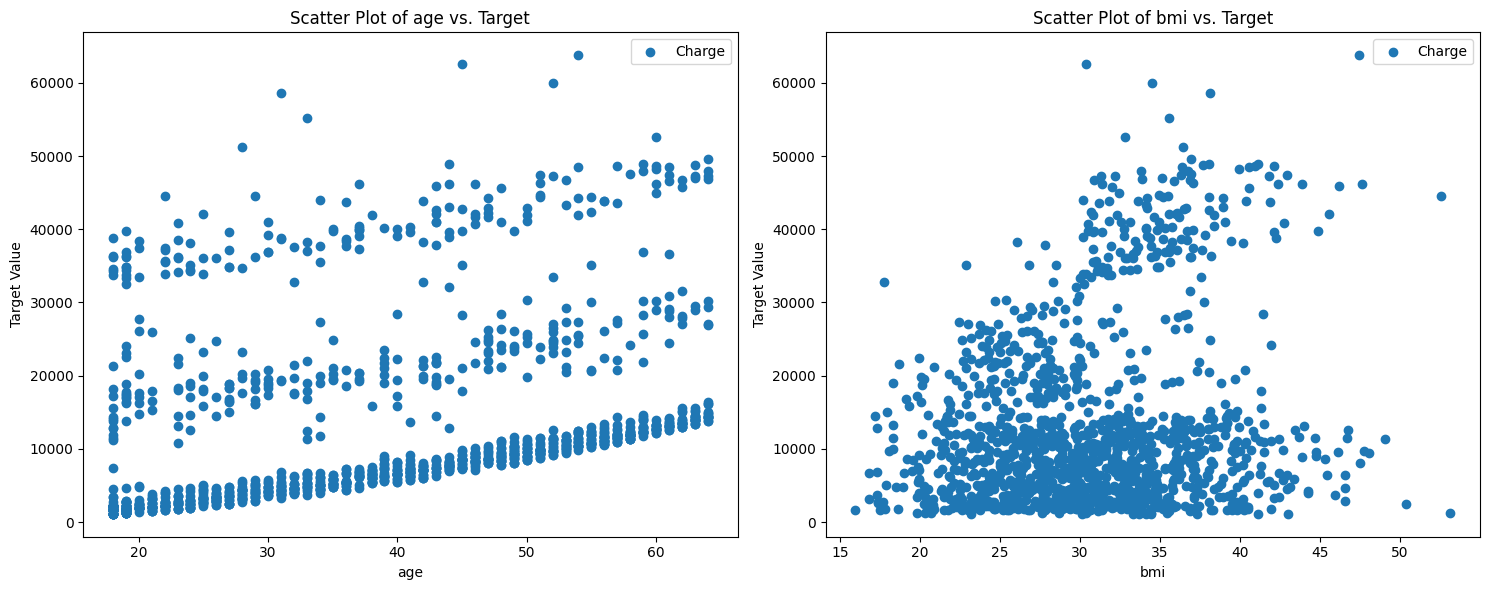

In [37]:
num_rows = 1
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
axes = axes.flatten()
for i, feature in enumerate(features_scatter):
    ax = axes[i]
    ax.scatter(df[feature], df['charges'], label='Charge')  # Assuming 'target' is the target variable
    ax.set_xlabel(feature)
    ax.set_ylabel("Target Value")  # Adjust label based on your target data
    ax.set_title("Scatter Plot of " + feature + " vs. Target")
    ax.legend()

plt.tight_layout()
plt.show()

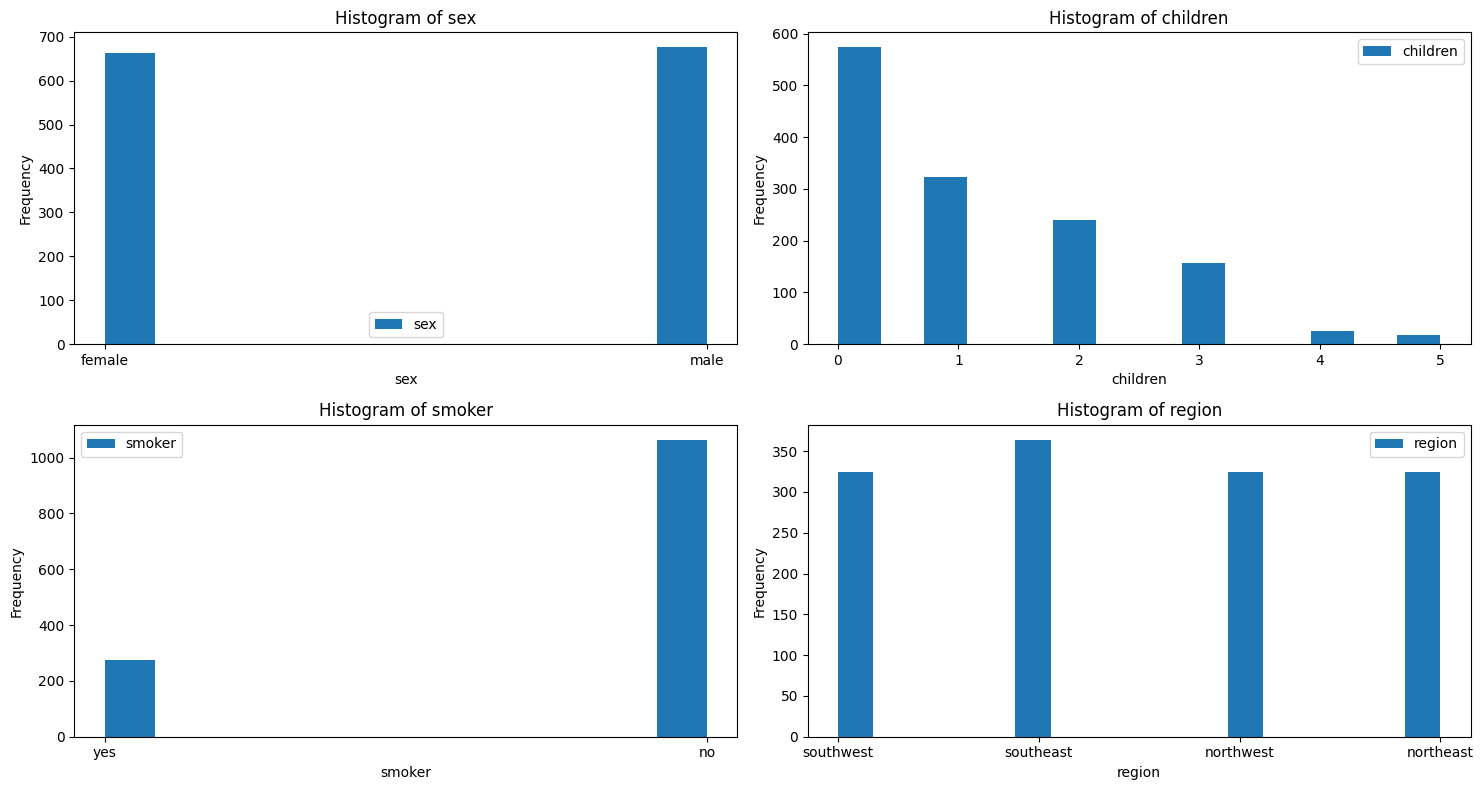

In [39]:
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
axes = axes.flatten()
for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(df[feature], bins='auto', label=feature)  # Adjusted line for histogram
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of " + feature)
    ax.legend()

plt.tight_layout()
plt.show()


In [52]:
mapping_sex = {'female': 0,'male': 1}
df['sex'] = df['sex'].map(mapping_sex)

In [55]:
mapping_smoke = {'no': 0,'yes': 1}
df['smoker'] = df['smoker'].map(mapping_smoke)

In [75]:
print(sklearn.__version__)

1.4.2


In [130]:
df = pd.get_dummies(df, columns=['region'], drop_first=True, dtype=int)
df


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [131]:
y = df['charges']
X = df.drop('charges',axis = 1 )

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Modeling

In [135]:
rf = RandomForestRegressor(random_state=1)
params= {   
    "n_estimators":[100,200 ,300],
    "max_depth": [10,20,30]
}
model = GridSearchCV(
    rf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1
)
model.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [136]:
model.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [141]:
y_pred = model.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mape)

28.631335155270204


Catboost

In [148]:
cbr = CatBoostRegressor(loss_function='RMSE',  # Adjust parameters as needed
                          learning_rate=0.01,
                          iterations=100,
                          eval_metric='RMSE')

In [149]:
cbr.fit(X_train, y_train)

0:	learn: 11846.0251112	total: 2.6ms	remaining: 257ms
1:	learn: 11759.0791030	total: 6.05ms	remaining: 297ms
2:	learn: 11676.0273211	total: 8.82ms	remaining: 285ms
3:	learn: 11584.7403391	total: 14.9ms	remaining: 358ms
4:	learn: 11496.6656266	total: 21.2ms	remaining: 404ms
5:	learn: 11413.5902551	total: 22.7ms	remaining: 356ms
6:	learn: 11326.6316884	total: 24.4ms	remaining: 324ms
7:	learn: 11243.2739499	total: 25.5ms	remaining: 294ms
8:	learn: 11160.7832605	total: 32.2ms	remaining: 326ms
9:	learn: 11075.7516706	total: 35.9ms	remaining: 323ms
10:	learn: 10995.5693698	total: 38.4ms	remaining: 311ms
11:	learn: 10910.0542473	total: 39.9ms	remaining: 293ms
12:	learn: 10831.9547641	total: 44ms	remaining: 295ms
13:	learn: 10750.2150381	total: 45.6ms	remaining: 280ms
14:	learn: 10675.3851771	total: 47.5ms	remaining: 269ms
15:	learn: 10606.1779512	total: 50.5ms	remaining: 265ms
16:	learn: 10533.6474725	total: 56.2ms	remaining: 274ms
17:	learn: 10459.4328125	total: 59.2ms	remaining: 270ms
18:	l

In [150]:
y_test = cbr.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mape)

26.947722718610436


LightGBM

In [153]:
clf = lgb.LGBMRegressor()
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 12894.152160


LGBMRegressor()

In [154]:
y_test = clf.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mape)

17.22543051142989


In [156]:
model = XGBRegressor(objective='reg:squarederror',  # Adjust parameters as needed
                    learning_rate=0.01,
                    n_estimators=300,
                    eval_metric='rmse')

In [157]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [158]:
y_test = model.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mape)

9.337176105513386
